<img src="./header.png" width=55%>

<img src="https://cdnp3.stackassets.com/42e3d5100c4c83162def7a690cf51acda1631b64/store/opt/596/298/58be047314c354bc0b2bd925b58e873c4d0b0f9a7ebc5ea2eff2ec3d6242/27dec723e2238e11de6db0dfa8ad9daaf62bac50_main_hero_image.jpg" width=55%>


<h1 align="center">Análisis de Datos y Visualizaciones con Python</h1>
<center>
        <b>Presentadores:</b>
<br>
<br> 
<i><b>Sebastián Bórquez</b> - <a href="mailto:sebastian.borquez.g@gmail.com">sebastian.borquez.g@gmail.com</a> - DI UTFSM</i><br>
    <i><b>Patricio Campaña</b> - <a href="mailto:patricio.campana@sansano.usm.cl">patricio.campana@sansano.usm.cl</a> - DI UTFSM</i><br>
</center>


# Temario

* [0.- ¿Por qué hacer análisis exploratorio?](#intro)
* [1.- El ambiente de desarrollo](#tools)
* [2.- Caso 1: Migración en Chile](#caso1)
* [3.- Caso 2: Yahoo Finances](#caso2)
* [4.- Caso 3: Demencia y Alzheimer](#caso3)
* [5.- Resumen](#summary)
* [6.- Recursos en Internet](#sources)

<div id="intro"></div>
    
# ¿Por qué hacer análisis exploratorio?

Análisis exploratorio y visualizacion de datos son dos pilares fundamentales del toobox de un data scientist. 

En esta charla utilizaremos Python para aprenderemos como a través de la exploraración y la visualización podemos descubrir que historia cuentan los datos.


<div id="tools"></div>
    
# El ambiente de desarrollo

## Jupyter notebooks

In [ ]:
from IPython.display import display, HTML

## Pandas

[Pandas](http://pandas.pydata.org/) (_panel data_) es un módulo de Python que nos provee de estructuras de datos, alto desempeño y herramientas para el _análisis de datos_.

Por lo general, como _data scientist_ trabajaremos con datos en forma de tablas, estos por lo general se encuentran almacenados en formatos _csv, xlsx, tsv_, entre otros. Pandas nos ofrece una manera conveniente para _cargar, procesar, analizar y guardar_ dichas tablas.

Las dos estructuras principales que utiliza pandas son las __Series__ y los __Dataframes__.

In [409]:
import pandas as pd
import numpy as np

## Matplotlib

In [ ]:
import matplotlib.pyplot as plt

#como ejemplo plotea el interes vs el tiempo de la charla xdd o alguna cosa chistosa
# o tiempo vs quien habla (yo o tu) como dos sinusoidales :v

<div id="caso1"></div>
    
# Caso 1: Migración en Chile
<img src="https://www.extranjeria.gob.cl/media/2016/03/logo-migraciones-sin-fondo-1.png" width=40% height=35%>

El segundo caso consiste de datos de inmigración en Chile durante el año 2018. Estos se encuentran disponibles en la página del __[Departamento de Extranjería y Migración](https://www.extranjeria.gob.cl/estadisticas-migratorias/)__ del Ministerio del Interior y Seguridad Pública. 

_Puedes descargar estos datasets desde este [link](https://www.extranjeria.gob.cl/estadisticas-migratorias/)._

In [ ]:
visas_file = "./data/CH_2018_P.xlsx"

## Cargar datos

In [ ]:
pd.read_excel?

__pd.read_excel()__ nos entrega un __DataFrame__, el cual es la representación que utiliza pandas para una tabla, esta posee tanto los nombres de las columnas, indices y los valores de los datos contenidos en la tabla.

In [ ]:
visas = pd.read_excel(visas_file)

print(type(visas))

## Conociendo el Dataframe

Podemos hacernos una idea del contenido del _Dataframe_ utilizando los métodos __head(n)__ y __tail(n)__ . Tal como sus nombres lo indican, muestran los **n** primeros o __n__ últimas filas del _Dataframe_ respectivamente.

In [ ]:
visas.head(5)

In [ ]:
visas.tail(5)

Vamos a echar un vistazo a la dimensionalidad de los datos, nombres de las columnas y sus tipos.

In [ ]:
print(f"Cantidad de filas: {len(visas)}")
print(f"Dimensiones: {visas.shape}")
print(f"Cantidad de valores: {visas.size}")

In [ ]:
print("Columnas: ", *visas.columns)

In [ ]:
visas.info()

También podemos revisar cada columna, ahora veremos las diferentes valores que contiene cada columna

In [ ]:
for column in visas:
    print(f"{column} tiene {visas[column].nunique()} valores diferentes")

In [ ]:
print(f"Valores de ESTUDIOS: {visas.ESTUDIOS.unique()}")

In [ ]:
print(f"Cantidad de individuos por cada valor de ESTUDIOS:")
visas.ESTUDIOS.value_counts()

Quizás lo que nos interesa es saber como se distribuyen nuestros individuos pero en dos variables. Para esto existen las _tablas de contigencia_ disponibles con el comando __crosstab__.

In [ ]:
pd.crosstab(visas["ACTIVIDAD"], visas["SEXO"])

## Consultas

Pandas también nos da la opción de realizar consultas, por ejemplo queremos saber solo los datos de los inmigrantes que vienen de _PERÚ_.

In [ ]:
visas[visas["PAIS"] == "PERÚ"].head(5)

O podemos anidar múltiples consultas utilizando __AND, NOT__ y __OR__, para esto usamos __&,|__ y __~__ respectivamente.

In [ ]:
visas[(visas["PAIS"] == "PERÚ") & ((visas["COMUNA"] == "VIÑA DEL MAR") | (visas["COMUNA"] == "VALPARAISO"))].head(5)

Tambien podemos utilizar __isin__ para corroborar con una lista de valores.

In [ ]:
visas[(visas["ACTIVIDAD"].isin(['ESTUDIANTE'])) & ~(visas["ESTUDIOS"].isin(['PREBASICO','BASICO', 'MEDIO', 'NO INFORMA', 'NINGUNO']))].head(10)

## Modificando el Dataframe

No tan solo podemos acceder a los valores, podemos crear nuevas columnas a partir de las actuales, modificar columnas o incluso eliminar columnas que no necesitamos.


Por ejemplo, podemos crear una nueva columna que obtenga la edad de las personas.

In [ ]:
from datetime import datetime

visas["EDAD"] = (datetime.now() - visas["FECH-NAC"]).transform(lambda x: x.days // 365)
visas.head(5)

Podemos modificar columnas, por ejemplo en la lista de _ESTUDIOS_ tiene valores que son "repetidos" pero tienen diferente nombre. Me refiero a __no indica__, __NO INFORMA__. Queremos eliminar estos dos valores y dejar solo uno.

In [ ]:
visas["ESTUDIOS"].replace("no indica", "NO INFORMA", inplace=True)
visas["ESTUDIOS"].value_counts()

También se puede dar el caso que algunas columnas sean innecesarias, por ejemplo el __AÑO__, ya que en este caso siempre es 2018.

In [ ]:
visas.drop(columns=["AÑO", "FECH-NAC", "TIT_DEP"], inplace=True)
visas.head(5)

## Agrupando

Finalmente podemos agrupar los valores por datos, por ejemplo queremos saber como se distribuyen los inmigrantes por región.

In [ ]:
regiones = visas.groupby("REGION")
type(regiones)

In [ ]:
regiones.size()

In [ ]:
regiones.get_group("REGION DE ATACAMA").head(5)

In [ ]:
for region, df in regiones:
    display(HTML(f"<h3 align='center'>{region}</h3>"))
    display(pd.crosstab(df["PAIS"],df["COMUNA"]))

<h3>Visualizaciones</h3>

Si quieres mostrar resultados, lo mejor es mostrarlo a través de gráficos por tres razones:
* Resumir la información
* Se pueden encontrar patrones
* Es más fácil de entender cuando compartas tus resultados

<div id="caso2"></div>
    
# Caso 2: Yahoo Finances

<img src="https://i0.wp.com/cd1.eju.tv/wp-content/uploads/2016/07/578a40b2c03d5.jpg?resize=830%2C415" width=45%>

En el primer caso utilizaremos datos de [__Yahoo Finances__](https://finance.yahoo.com/). En concreto, analizaremos las acciones de [_Nintendo_](https://www.nintendo.co.jp/) entre los años 2013 a 2018.

_Puedes descargar este dataset desde este [link](https://finance.yahoo.com/quote/7974.T/history?period1=1385607600&period2=1543374000&interval=1d&filter=history&frequency=1d)._


In [ ]:
ntdo_file = "./data/NINTENDO.CSV"

In [252]:
ntdo = pd.read_csv(ntdo_file, sep=',')

print(f"Cantidad de filas: {len(ntdo)}")
print(f"Dimensiones: {ntdo.shape}")
print(f"Cantidad de valores: {ntdo.size}")
print()

ntdo.info()
ntdo.head(5)

Cantidad de filas: 1246
Dimensiones: (1246, 7)
Cantidad de valores: 8722

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 7 columns):
Date         1246 non-null object
Open         1246 non-null float64
High         1246 non-null float64
Low          1246 non-null float64
Close        1246 non-null float64
Adj Close    1246 non-null float64
Volume       1246 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.2+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-28,13240.0,13380.0,12830.0,12960.0,12190.917969,924700
1,2013-11-29,12970.0,13190.0,12970.0,13130.0,12350.829102,683200
2,2013-12-02,13150.0,13270.0,13080.0,13140.0,12360.236328,401900
3,2013-12-03,13230.0,13270.0,12790.0,12820.0,12059.225586,767000
4,2013-12-04,12670.0,12700.0,12520.0,12550.0,11805.247070,858400


In [253]:
ntdo["Date"].dtype

dtype('O')

In [254]:
ntdo["Date"] = pd.to_datetime(ntdo["Date"], format='%Y-%m-%d')
ntdo["Date"].dtype

dtype('<M8[ns]')

In [255]:
ntdo.set_index("Date", inplace=True)
ntdo.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-28,13240.0,13380.0,12830.0,12960.0,12190.917969,924700
2013-11-29,12970.0,13190.0,12970.0,13130.0,12350.829102,683200
2013-12-02,13150.0,13270.0,13080.0,13140.0,12360.236328,401900
2013-12-03,13230.0,13270.0,12790.0,12820.0,12059.225586,767000
2013-12-04,12670.0,12700.0,12520.0,12550.0,11805.247070,858400


O al momento de cargar, podemos usar:

In [256]:
ntdo = pd.read_csv(ntdo_file, index_col="Date", parse_dates=['Date'], date_parser=lambda x: pd.datetime.strptime(x, '%Y-%m-%d'))

ntdo.info()
display(ntdo.head(5))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1246 entries, 2013-11-28 to 2018-11-28
Data columns (total 6 columns):
Open         1246 non-null float64
High         1246 non-null float64
Low          1246 non-null float64
Close        1246 non-null float64
Adj Close    1246 non-null float64
Volume       1246 non-null int64
dtypes: float64(5), int64(1)
memory usage: 68.1 KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-28,13240.0,13380.0,12830.0,12960.0,12190.917969,924700
2013-11-29,12970.0,13190.0,12970.0,13130.0,12350.829102,683200
2013-12-02,13150.0,13270.0,13080.0,13140.0,12360.236328,401900
2013-12-03,13230.0,13270.0,12790.0,12820.0,12059.225586,767000
2013-12-04,12670.0,12700.0,12520.0,12550.0,11805.247070,858400


In [257]:
ntdo.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1.246000e+03
mean,25187.869181,25520.955056,24855.533708,25184.743178,24568.224032,1.786336e+06
std,11820.055456,11926.653626,11688.031281,11808.693077,11909.306552,2.112144e+06
min,10555.000000,10670.000000,10070.000000,10595.000000,10049.558594,0.000000e+00
25%,14225.000000,14465.000000,13976.250000,14327.500000,13544.886231,6.526750e+05
50%,22542.500000,23080.000000,22157.500000,22607.500000,21800.635742,1.256800e+06
75%,36237.500000,36742.500000,35927.500000,36415.000000,35985.000000,2.221525e+06
max,49800.000000,49980.000000,49010.000000,49590.000000,48892.339844,2.613730e+07


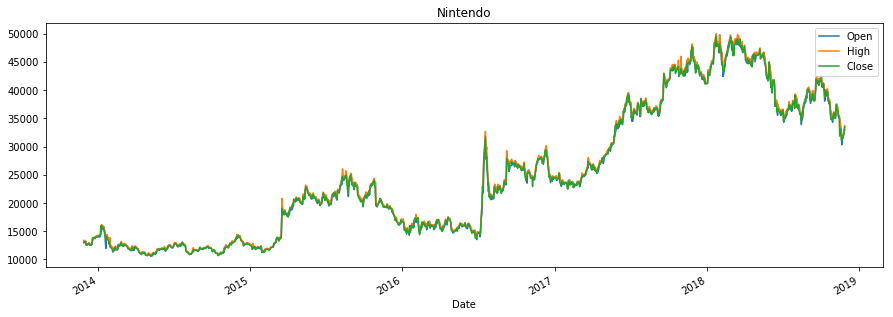

In [259]:
ntdo[["Open", "High", "Close"]].plot.line(figsize=(15,5))
plt.title("Nintendo");

In [294]:
daterange = ntdo["2016-01-01":"2017-01-01"]
daterange.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,16550.0,17180.0,16550.0,16655.0,15980.574219,739400
2016-01-05,16500.0,16705.0,16365.0,16410.0,15745.497070,515700
2016-01-06,15900.0,15940.0,15030.0,15160.0,14546.113281,1810900
2016-01-07,15340.0,15640.0,15190.0,15225.0,14608.480469,1171000
2016-01-08,15150.0,15745.0,15125.0,15370.0,14747.608398,1024500


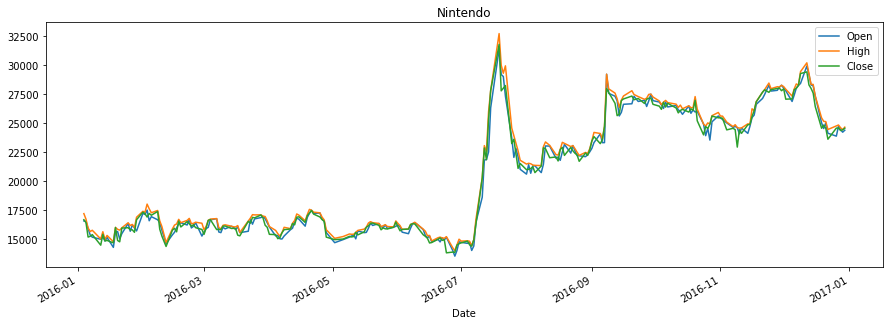

In [261]:
daterange[["Open", "High", "Close"]].plot.line(figsize=(15,5))
plt.title("Nintendo");

In [262]:
close = daterange["Close"]

min_value, max_value = close.min(), close.max()
mean = close.mean()
std = close.std()
counts = close.count()
print(f"counts: {counts}\nmin: {min_value}\nmax: {max_value}\nmean: {mean}\nstd: {std}")

counts: 245
min: 13800.0
max: 31770.0
mean: 20259.938775510203
std: 4985.333622557613


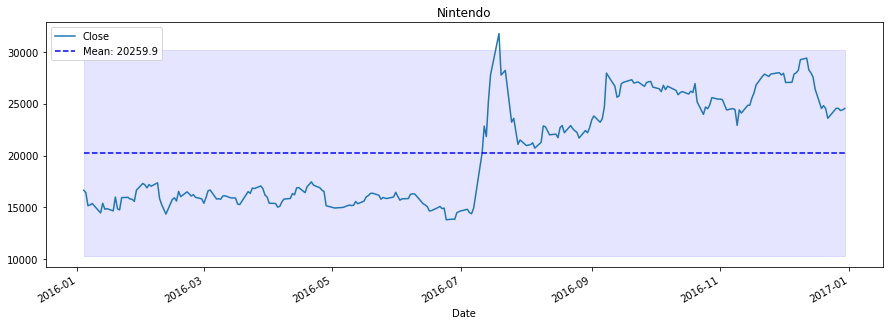

In [268]:
close.plot.line(figsize=(15,5))

plt.plot(close.index, [mean for i in range(counts)],'--b', label=f"Mean: {mean:5.6}")
plt.fill_between(close.index, mean-2*std, mean+2*std, color='b', alpha=0.1)

plt.legend()
plt.title("Nintendo");

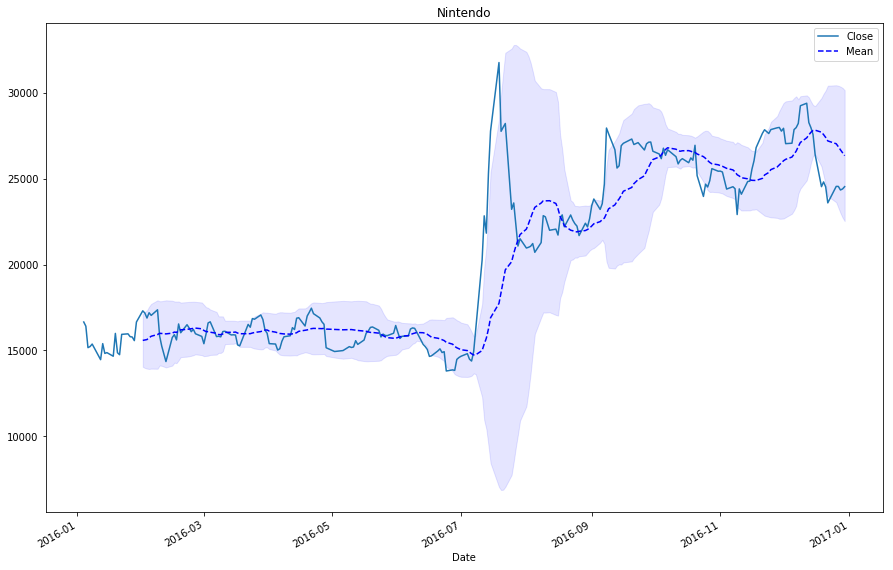

In [413]:
window = 20

daterange = daterange.assign(
                             mean = close.rolling(window).mean(), 
                             std = close.rolling(window).std()
                        )


mean = daterange[["mean"]]
range_std = (daterange["mean"] - 2 * daterange["std"], daterange["mean"] + 2 * daterange["std"])

daterange[["Close"]].plot.line(figsize=(15,10))
plt.plot(daterange[["mean"]],'--b', label="Mean")
plt.fill_between(daterange.index, range_std[0], range_std[1], color='b', alpha=0.1)

plt.legend()
plt.title("Nintendo");

## Volatilidad

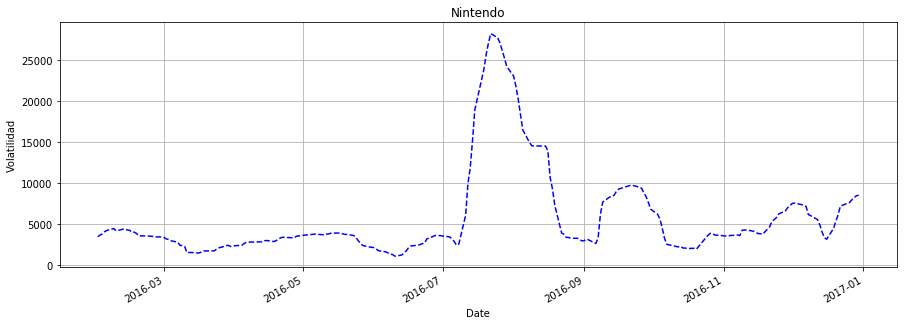

In [441]:
daterange = daterange.assign(volatility = daterange["std"] * np.sqrt(window))

daterange[["volatility"]].plot.line( figsize=(15,5), legend=None, style="--b")
plt.grid()
plt.title("Nintendo")
plt.ylabel("Volatilidad");

## CandleStick Plot

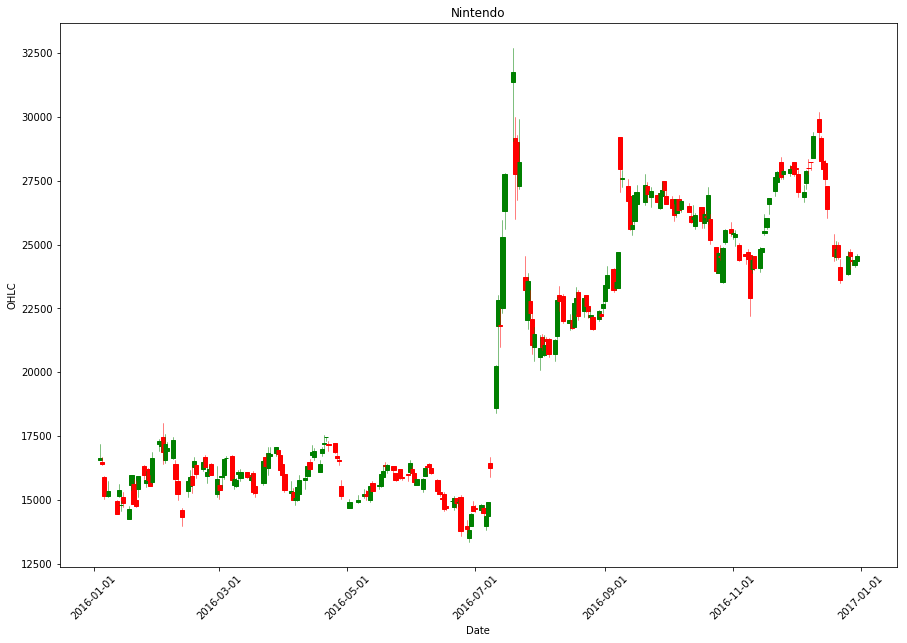

In [407]:
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

dat = daterange.reset_index()[["Date", "Open", "High", "Low", "Close"]]
dat["Date"] = dat["Date"].map(mdates.date2num)


f1, ax = plt.subplots(figsize = (15,10))
_ = candlestick_ohlc(ax, dat.values, width=2, colorup='g', alpha =1)

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45)
ax.set_xlabel(idx_name)
ax.set_ylabel("OHLC")
ax.set_title("Nintendo");

# Haciendo las visualizaciones más interactivas


## Ideas

* Hacer un plot donde se elija cuales valores mostrar (close, open, high)
* Hacer un plot que se pueda elegir un rango de fechas para mostrar y un subplot donde esté todo (ver imagen)
* Agregarle una opcion para cambiar el tamaño de la ventana del rolling

### IMAGEN V
<img src="https://dz13w8afd47il.cloudfront.net/graphics/9781787123137/graphics/image_15_014.png">

<div id="caso3"></div>

# caso 3

<div id="summary">
    
# Resumen

<div id="sources"></div>
    
# Recursos en Internet

Para continuar tu camino en convertirte en un verdadero _Data scientist_ te recomendamos las siguentes página y libros que te ayudarán en esta travesía.

### Libros

### Cursos en línea 

### Datasets

### CheatSheets

### Articulos